# Understanding Data, and Data Preprocessing

Files: <br>

- stations-i880n.csv: detector station information
- flow_speed_{num}.csv: num = 1, 2, 3; traffic flow and speed information
- occ_{num}.csv: num = 1, 2, 3; occupancy information.

In [1]:
import pandas as pd

In [2]:
stations = pd.read_csv("data/I88N/stations-i880n.csv")

In [11]:
stations.columns

Index(['Fwy', 'District', 'County', 'City', 'CA PM', 'Abs PM', 'Length', 'ID',
       'Name', 'Lanes', 'Type', 'Sensor Type', 'HOV', 'MS ID', 'IRM'],
      dtype='object')

In [13]:
stations.ftypes

Fwy             object:dense
District         int64:dense
County          object:dense
City            object:dense
CA PM           object:dense
Abs PM         float64:dense
Length         float64:dense
ID               int64:dense
Name            object:dense
Lanes            int64:dense
Type            object:dense
Sensor Type     object:dense
HOV             object:dense
MS ID           object:dense
IRM             object:dense
dtype: object

In [4]:
flow_speed_1 = pd.read_csv("data/I88N/flow_speed1.csv")

In [23]:
flow_speed_1.columns

Index(['Station ID', '5 Minutes', 'Flow (Veh/5 Minutes)', 'Speed (mph)',
       '# Lane Points', '% Observed'],
      dtype='object')

In [5]:
occ_1 = pd.read_csv("data/I88N/occ1.csv")

In [24]:
occ_1.columns

Index(['Station ID', '5 Minutes', 'Occupancy (%)', '# Lane Points',
       '% Observed'],
      dtype='object')

In [16]:
stations.loc[stations["ID"] == 408907]

,Fwy,District,County,City,CA PM,Abs PM,Length,ID,Name,Lanes,Type,Sensor Type,HOV,MS ID,IRM
0,I880-N,4,Santa Clara,NaN,0.31,0.31,0.425,408907,SB/NB 280 rm-n-fly/diag,3,Mainline,loops,No,DT596,L3-N-37-880-00031


In [9]:
flow_speed_1.head(5)

,Station ID,5 Minutes,Flow (Veh/5 Minutes),Speed (mph),# Lane Points,% Observed
0,408907,01/01/2017 00:00,95.0,68.8,3,0.0
1,408907,01/01/2017 00:05,91.0,68.4,3,0.0
2,408907,01/01/2017 00:10,91.0,68.4,3,0.0
3,408907,01/01/2017 00:15,86.0,68.5,3,0.0
4,408907,01/01/2017 00:20,82.0,68.5,3,0.0


In [10]:
occ_1.head(5)

,Station ID,5 Minutes,Occupancy (%),# Lane Points,% Observed
0,408907,01/01/2017 00:00,2.1,3,0.0
1,408907,01/01/2017 00:05,2.0,3,0.0
2,408907,01/01/2017 00:10,2.0,3,0.0
3,408907,01/01/2017 00:15,1.9,3,0.0
4,408907,01/01/2017 00:20,1.8,3,0.0


In [18]:
incidents = pd.read_csv("data/I88N/otherIncident.csv")

In [19]:
incidents

,Incident_Id,Start_Time,Duration_(mins),Freeway,CA_PM,Abs_PM,Source,AREA,LOCATION,DESCRIPTION
0,16917059,1/1/17 0:24,3,I880-N,0.4,0.4,CHP,San Jose,I880 N / I280 S I880 N Con,1183-Trfc Collision-Unkn Inj
1,16917196,1/1/17 2:14,14,I880-N,R34.773,45.0,CHP,Oakland,I880 N West Grand Ave Onr / I880 N I80 E Con,1183-Trfc Collision-Unkn Inj
2,16917233,1/1/17 2:44,6,I880-N,3.673,13.9,CHP,Hayward,I880 N / Nimitz Cvef Scale Ofr,1183-Trfc Collision-Unkn Inj
3,16917332,1/1/17 4:31,2,I880-N,20.473,30.7,CHP,Hayward,I880 N / Lewelling Blvd Onr,20002-Hit and Run No Injuries
4,16917615,1/1/17 9:25,12,I880-N,17.273,27.5,CHP,Hayward,I880 N / W Winton Ave Ofr,1125-Traffic Hazard
5,16917677,1/1/17 10:59,43,I880-N,8.573,18.8,CHP,Hayward,I880 N / Thornton Ave Ofr,1125-Traffic Hazard
6,16917744,1/1/17 11:52,9,I880-N,16.373,26.6,CHP,Hayward,I880 N / I880 N Sr92 Con,1125-Traffic Hazard
7,16917873,1/1/17 13:27,10,I880-N,25.673,35.9,CHP,Oakland,I880 N / Hegenberger Rd W Onr,1125A-Animal Hazard
8,16918027,1/1/17 16:11,3,I880-N,15.273,25.5,CHP,Hayward,I880 N / W Tennyson Rd Ofr,1125-Traffic Hazard
9,16918100,1/1/17 17:02,11,I880-N,12.773,23.0,CHP,Hayward,I880 N / Alvarado Niles Rd Ofr,1125-Traffic Hazard


## Sample Date for Testing

In [26]:
# break column `5 minutes` into timestamps, and add date and time columns 
# to flow_speed_1 and occ_1
# sample a few for test
flow_speed_sample = flow_speed_1.sample(n=10, replace=True)

In [27]:
flows

,Station ID,5 Minutes,Flow (Veh/5 Minutes),Speed (mph),# Lane Points,% Observed
1995792,402290,08/18/2017 00:45,132.0,66.0,7,0.0
3376822,401639,03/23/2017 02:55,44.0,67.1,4,100.0
1298938,402286,10/08/2017 23:45,264.0,63.1,5,0.0
497146,400343,11/19/2017 13:20,350.0,59.6,3,100.0
675497,400045,08/21/2017 22:15,151.0,68.6,4,0.0
2623051,402789,10/19/2017 09:30,464.0,46.5,4,100.0
2334366,402800,12/17/2017 19:40,385.0,68.5,5,100.0
8306,408907,01/31/2017 20:10,205.0,65.7,3,0.0
233976,400057,04/20/2017 14:35,373.0,58.9,3,100.0
1637290,401464,02/10/2017 00:10,108.0,68.6,4,100.0


In [34]:
flow_speed_sample["5 Minutes"] = flow_speed_sample["5 Minutes"].apply(lambda x: pd.to_datetime(x))

In [35]:
flow_speed_sample["5 Minutes"].dtypes

dtype('<M8[ns]')

In [36]:
# Now apply to all data
flow_speed_1["5 Minutes"] = flow_speed_1["5 Minutes"].apply(lambda x: pd.to_datetime(x))

In [37]:
occ_1["5 Minutes"] = occ_1["5 Minutes"].apply(lambda x: pd.to_datetime(x))

In [39]:
flow_speed_1["Date"] = flow_speed_1["5 Minutes"].dt.date

In [41]:
flow_speed_1["Time"] = flow_speed_1["5 Minutes"].dt.time

In [42]:
occ_1["Date"] = occ_1["5 Minutes"].dt.date
occ_1["Time"] = occ_1["5 Minutes"].dt.time

In [43]:
occ_1.tail(5)

,Station ID,5 Minutes,Occupancy (%),# Lane Points,% Observed,Date,Time
3557623,400662,2017-12-30 23:35:00,2.8,4,100.0,2017-12-30,23:35:00
3557624,400662,2017-12-30 23:40:00,3.0,4,100.0,2017-12-30,23:40:00
3557625,400662,2017-12-30 23:45:00,2.5,4,100.0,2017-12-30,23:45:00
3557626,400662,2017-12-30 23:50:00,2.8,4,100.0,2017-12-30,23:50:00
3557627,400662,2017-12-30 23:55:00,3.1,4,100.0,2017-12-30,23:55:00


In [44]:
flow_speed_1.to_csv("data/I88N-processed/flow_speed_1.csv")
occ_1.to_csv("data/I88N-processed/occ_1.csv")

In [51]:
# get all the available dates
all_dates_1 = flow_speed_1["Date"].unique()
all_dates_1

array([datetime.date(2017, 1, 1), datetime.date(2017, 1, 3),
       datetime.date(2017, 1, 4), datetime.date(2017, 1, 5),
       datetime.date(2017, 1, 6), datetime.date(2017, 1, 7),
       datetime.date(2017, 1, 8), datetime.date(2017, 1, 9),
       datetime.date(2017, 1, 10), datetime.date(2017, 1, 11),
       datetime.date(2017, 1, 12), datetime.date(2017, 1, 13),
       datetime.date(2017, 1, 14), datetime.date(2017, 1, 15),
       datetime.date(2017, 1, 17), datetime.date(2017, 1, 18),
       datetime.date(2017, 1, 19), datetime.date(2017, 1, 20),
       datetime.date(2017, 1, 21), datetime.date(2017, 1, 22),
       datetime.date(2017, 1, 23), datetime.date(2017, 1, 24),
       datetime.date(2017, 1, 25), datetime.date(2017, 1, 26),
       datetime.date(2017, 1, 27), datetime.date(2017, 1, 28),
       datetime.date(2017, 1, 29), datetime.date(2017, 1, 30),
       datetime.date(2017, 1, 31), datetime.date(2017, 2, 1),
       datetime.date(2017, 2, 2), datetime.date(2017, 2, 3),
   

In [52]:
all_dates_1.size

353

In [54]:
all_stations_1 = flow_speed_1["Station ID"].unique()

In [55]:
all_stations_1

array([408907, 400951, 400057, 400147, 400343, 401560, 400045, 400122,
       401541, 402281, 402283, 402285, 402286, 400088, 402288, 413026,
       401464, 401489, 401538, 402290, 402292, 401643, 402800, 402828,
       407219, 402789, 408755, 402802, 408756, 400189, 400309, 400417,
       400249, 401639, 400662])

In [56]:
all_stations_1.size

35

In [60]:
all_stations = stations["ID"].unique()

In [66]:
all_stations.shape

(102,)

In [67]:
flow_speed_1.shape

(3557628, 8)

In [68]:
occ_1.shape

(3557628, 7)

# Sample data for parameter tuning

The paper took a bootstrapping approach to test statistically the performance. <br/>
Bootstrap experiments were conducted 30 times.  At each time, 32 days' data were randomly sampled from all days with replacement.

We use a smaller dataset to test our code.  We have 353 days in the year of 2017, let's sample 10 days first.

In [80]:
import numpy as np
import random

In [82]:
len(all_dates_1)

353

In [86]:
# draw 10 random numbers from dates array
random_indicies = random.sample(range(0, all_dates_1.size - 1), 10)
random_indicies.sort()

In [87]:
sample_dates_1 = all_dates_1[random_indicies]

In [88]:
sample_dates_1

array([datetime.date(2017, 1, 9), datetime.date(2017, 1, 15),
       datetime.date(2017, 2, 26), datetime.date(2017, 4, 13),
       datetime.date(2017, 4, 16), datetime.date(2017, 8, 6),
       datetime.date(2017, 8, 20), datetime.date(2017, 10, 18),
       datetime.date(2017, 10, 20), datetime.date(2017, 12, 13)],
      dtype=object)

In [89]:
sample_flow_speed_1 = flow_speed_1.loc[flow_speed_1["Date"].isin(sample_dates_1)]

In [91]:
sample_flow_speed_1.head(5)

,Station ID,5 Minutes,Flow (Veh/5 Minutes),Speed (mph),# Lane Points,% Observed,Date,Time
2016,408907,2017-01-09 00:00:00,45.0,66.0,3,0.0,2017-01-09,00:00:00
2017,408907,2017-01-09 00:05:00,55.0,66.0,3,0.0,2017-01-09,00:05:00
2018,408907,2017-01-09 00:10:00,65.0,66.0,3,0.0,2017-01-09,00:10:00
2019,408907,2017-01-09 00:15:00,50.0,66.1,3,0.0,2017-01-09,00:15:00
2020,408907,2017-01-09 00:20:00,42.0,65.5,3,0.0,2017-01-09,00:20:00


In [93]:
sample_occ_1 = occ_1.loc[occ_1["Date"].isin(sample_dates_1)]

In [94]:
sample_occ_1.head(5)

,Station ID,5 Minutes,Occupancy (%),# Lane Points,% Observed,Date,Time
2016,408907,2017-01-09 00:00:00,1.8,3,0.0,2017-01-09,00:00:00
2017,408907,2017-01-09 00:05:00,1.9,3,0.0,2017-01-09,00:05:00
2018,408907,2017-01-09 00:10:00,2.1,3,0.0,2017-01-09,00:10:00
2019,408907,2017-01-09 00:15:00,1.8,3,0.0,2017-01-09,00:15:00
2020,408907,2017-01-09 00:20:00,1.8,3,0.0,2017-01-09,00:20:00


In [96]:
# save the work
sample_flow_speed_1.to_csv("data/I88N-processed/sample/sample_flow_speed_1.csv")
sample_occ_1.to_csv("data/I88N-processed/sample/sample_occ_1.csv")
pd.DataFrame(sample_dates_1).to_csv("data/I88N-processed/sample/sample_dates_1.csv")

Now we have samples of 35 stations in 10 days.
`sample_flow_speed_1` saves speed and flow, `sample_occ_1` saves occupancy information, for each station each day, from 00:00 to 23:55, i.e., for a single station, $$12 \ samples/hour \times 24 \ hours/day \times 10 \ days = 2880 \ samples/station.$$ And in total, $$2880 \ samples/station \times 35 \ stations = 100,800 \ samples$$ sample points.

In [98]:
sample_flow_speed_1.shape

(100783, 8)

In [99]:
sample_occ_1.shape

(100783, 7)

In [147]:
# For each station i, generate X[i]
X_1 = {}
have_holes = []
for i, stationId in enumerate(all_stations_1):
    sample_flow_speed_1_i = sample_flow_speed_1.loc[sample_flow_speed_1["Station ID"] == stationId]
    sample_occ_1_i = sample_occ_1.loc[sample_occ_1["Station ID"] == stationId]
    # we need them arranged in order of time for time series prediction
    num = len(sample_occ_1_i["Occupancy (%)"].values)
    if num != 2880:
        print(str(stationId) + ": " + str(num))
        have_holes.append(stationId)
    X_1_i = np.ndarray(shape=(3, num))
    X_1_i[0] = sample_occ_1_i["Occupancy (%)"].values
    X_1_i[1] = sample_flow_speed_1_i["Speed (mph)"].values
    X_1_i[2] = sample_flow_speed_1_i["Flow (Veh/5 Minutes)"].values
    X_1[str(stationId)] = X_1_i

400057: 2879
400147: 2879
400343: 2879
401541: 2879
402281: 2879
413026: 2879
402292: 2879
401643: 2879
402828: 2879
402789: 2879
408755: 2879
402802: 2879
408756: 2879
400417: 2879
400249: 2879
401639: 2879
400662: 2879


We can see that 17 points are missing, but let's leave it at this stage.

# Implement TSA DES estimator

### Basic functions

We first implement functions to compute root mean squarted error (RMSE).

We use the following formulae.
$$S_1(t) = \alpha X(i, t) + (1-\alpha)S_1(t-1)$$
$$S_2(t) = \alpha S_1(t) + (1-\alpha)S_2(t-1)$$
$$A(t) = 2S_1(t) - S_2(t)$$
$$B(t) = {\alpha \over (1-\alpha)} [S_1(t) - S_2(t)]$$
and finally,
$$Y(i, t+1) = A(i, t) + B(i, t)$$
where $Y(i, t+1)$ is the vector of predicted traffic variables for station $i$ at time $t+1$, and $X(i, t)$ is the vector of traffic variables for station $i$ at time $t$.

In [167]:
def RMSE(X, Y):
    """
        X: is a vector storing traffic parameters for one station for each time t
        Y: traffic parameter forecasts for each time t
    """
    return np.sqrt(np.mean((Y - X) ** 2, axis=1))

In [119]:
def S1(X, prev_S1, alpha):
    """
        Order 1 smoothing
    """
    return alpha * X + (1 - alpha) * prev_S1

In [120]:
def S2(S1, prev_S2, alpha):
    """
        Order 2 smoothing
    """
    return alpha * S1 + (1 - alpha) * prev_S2

In [157]:
def A(S1, S2):
    return 2 * S1 - S2

In [158]:
def B(S1, S2, alpha):
    return 1 / (1 - alpha) * (S1 - S2)

### Using Grid Search for Parameter Tuning
Check stations Id:

In [115]:
complete_stations = all_stations_1[np.isin(all_stations_1, have_holes, invert=True)]

In [116]:
complete_stations

array([408907, 400951, 401560, 400045, 400122, 402283, 402285, 402286,
       400088, 402288, 401464, 401489, 401538, 402290, 402800, 407219,
       400189, 400309])

Let's choose station 400309.

In [148]:
X_400309 = X_1["400309"]

In [149]:
X_400309

array([[  1.4,   1.5,   1. , ...,   2.6,   2. ,   2.1],
       [ 66.6,  67.5,  66.4, ...,  67.2,  67.7,  67.8],
       [ 64. , 115. ,  76. , ..., 153. , 116. , 129. ]])

The numpy array has three vectors. <br>
- 0: occupancy, in percentage
- 1: speed, in miles per hour (mph)
- 2: flow, number of vehicles per 5 minutes

Initialize $\alpha = 0.2$.

In [150]:
# initialize alpha
alpha = 0.2

In [151]:
# Initialize S1 and S2
num_400309 = X_400309[0].size
S1_400309 = np.zeros((3, num_400309))
S2_400309 = np.zeros((3, num_400309))

In [159]:
# Initialize Y
Y_400309 = np.zeros((3, num_400309))

The initial values for $S_1(t)$, as the paper suggests, is initialized to the average of the first 10 values:
$$S_1(10) = {1 \over 10}\sum_{t=1}^{10} X(i, t)$$
As for $S_2(t)$, the initial value can be set to the following:
$$S_2(10) = {1 \over 5} \sum_{t=1}^{5} [X(i, 2t) - X(i, 2t-1)]$$

In [152]:
S1_400309[:, 9] = np.mean(X_400309[:, 0:9], axis=1)

In [155]:
S2_400309[:, 9] = np.zeros((3,))
for i in range(5):
    S2_400309[:, 9] += (X_400309[:, 2 * i + 1] - X_400309[:, 2 * i])
S2_400309[:, 9] /= 5.0

In [156]:
S2_400309[:, 9]

array([4.4408921e-17, 3.4000000e-01, 8.2000000e+00])

In [164]:
# Start to iterate on t
for t in range(num_400309 - 1):
    if t > 9:
        S1_400309[:, t] = S1(X_400309[:, t], S1_400309[:, t-1], alpha)
        S2_400309[:, t] = S2(S1_400309[:, t], S2_400309[:, t-1], alpha)
        Y_400309[:, t+1] = A(S1_400309[:, t], S2_400309[:, t]) + B(S1_400309[:, t], S2_400309[:, t], alpha)

In [176]:
Y_400309[:, -20:-10]

array([[  3.11129933,   2.966042  ,   2.79843563,   2.67123012,
          2.5149694 ,   2.28236375,   2.33420159,   1.57000975,
          3.11012658,   2.67939628],
       [ 68.0413769 ,  67.72262724,  67.08972237,  66.64507435,
         66.89869665,  67.40506705,  67.23694143,  67.33586337,
         66.16173888,  65.64382965],
       [205.42285647, 193.94398273, 175.83974422, 164.53944181,
        157.9656706 , 149.55983019, 146.59769913, 102.47802728,
        176.22231621, 153.84976847]])

In [177]:
X_400309[:, -20:-10]

array([[  3.9,   3.7,   3.6,   3.4,   3.1,   3.4,   1.9,   5.5,   2.8,
          3.3],
       [ 66.8,  66.1,  66.1,  67.1,  67.7,  66.8,  67.2,  65. ,  65.5,
         66.6],
       [233. , 211. , 209. , 207. , 196. , 197. , 118. , 299. , 166. ,
        192. ]])

In [168]:
RMSE_400309 = RMSE(X_400309[:, 10:], Y_400309[:, 10:])

In [169]:
RMSE_400309

array([ 1.72303066,  4.92920212, 40.0771787 ])

### Visualize Results Using Matplotlib

Here we want to generate plots, for real values and predictions, for three traffic variables:
- Occupancy
- Speed
- Flow

In [178]:
import matplotlib.pyplot as plt

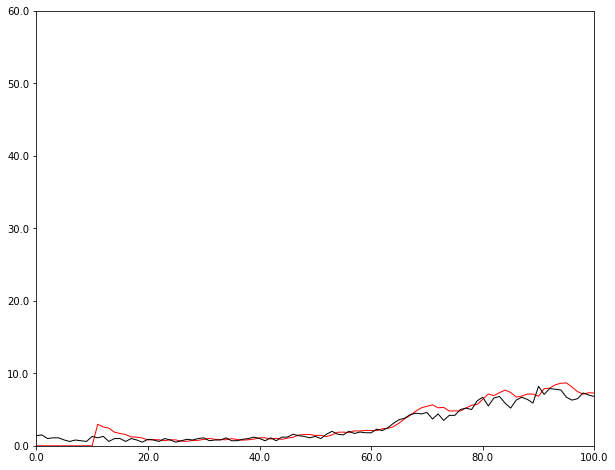

In [183]:
# Plot occupancy first
def plot_time_series(X, Y, X_label, Y_label):
    num = X.shape
    f, ax = plt.subplots(1, 1, figsize=(10, 8))
    ax.plot(np.array(range(num)), X, lw=1, color="black", label=X_label)
    ax.plot(np.array(range(num)), Y, lw=1, color="red", label=Y_label)
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 60)
    ax.set_xticklabels(ax.get_xticks(), fontsize=10)
    ax.set_yticklabels(ax.get_yticks(), fontsize=10)
    ax.legend(fontsize=10, loc=0)
    
    plt.show()